<a href="https://colab.research.google.com/github/george-zakharov/ml-random/blob/master/Tweet_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an exploration for Kaggle competition https://www.kaggle.com/c/nlp-getting-started/overview

# Install libs

In [27]:
from google.colab import files

import pandas as pd
import matplotlib.pyplot as plt

# Kaggle API

In [2]:
!pip install kaggle

In [5]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

In [8]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 63.2MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.3MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 135MB/s]


# EDA

## Train data

In [9]:
train_data = pd.read_csv('train.csv')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


It looks like we have nulls in data as was mentioned in competition

In [17]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [43]:
train_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

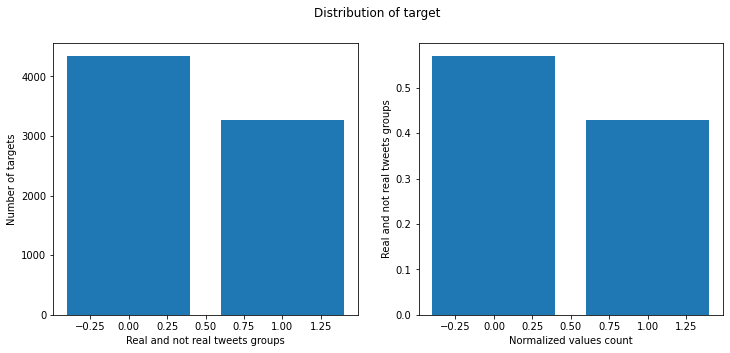

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.bar(train_data['target'].value_counts().index, train_data['target'].value_counts())
plt.xlabel('Real and not real tweets groups')
plt.ylabel('Number of targets')

plt.subplot(122)
plt.bar(train_data['target'].value_counts().index, train_data['target'].value_counts(normalize=True))
plt.xlabel('Normalized values count')
plt.ylabel('Real and not real tweets groups')

plt.suptitle('Distribution of target')
plt.show()

## Test data

In [11]:
test_data = pd.read_csv('test.csv')

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
